<a href="https://colab.research.google.com/github/LarrySerratos/CienciaMatematicadeDatos/blob/main/Data_Analyst_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analyst Assignment

## Introduction

You are working with a US retail customer on a pilot deployment.  They are using technology to track their merchandise throughout their supply chain.  The flow of their supply is:

*   **DC 1:**  Orders are filled and palletized.
*   **Truck:** Pallets travel from the DC 1 to DC 2 via semi-truck.
*   **DC 2:**  Pallets are unloaded, and additional merchandise may be added.  They are then reloaded onto a new truck.
*   **Truck:** Pallets travel from DC 2 to the Store.
*   **Store:** Pallets are unloaded, cases are removed, and stocked, and the empty cases are left behind the building awaiting pickup.

Your job is to dig into the data and find compelling insights to show the value fo the technology and help move the contract from a pilot into a full scaled deployment.



---

## Part 0: Imports

Import necessary packages and

In [ ]:
import pandas as pd

nombre_archivo = "Assignment_1.xlsx"

try:
    df = pd.read_excel(nombre_archivo)
    print("It Works!")
    print(df.head())


except FileNotFoundError:
    print(f"No se pudo encontrar el archivo {nombre_archivo}.")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")


It Works!
  asset_type  asset_id                           tag_id  Site            Zone  \
0       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
1       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
2       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   

      device_id                time_est       lat       lng  Temperature_C  \
0  7F9A8353E973 2022-08-02 11:59:26.628  47.79158 -65.68902           23.0   
1  EC5B0499234F 2022-08-02 12:00:22.660  47.79158 -65.68902           23.0   
2  7F9A8353E973 2022-08-02 12:01:11.234  47.79158 -65.68902           23.0   

   Temperature_F  
0           73.4  
1           73.4  
2           73.4  


### Dataset Overview

* Site:  A large space that could contain multiple readers. Ex: DC 1.
* Zone:  Point of interest. These represent areas in which repeaters are installed. These can be thought of as sub-zones.  Ex: Dock Doors.
* Asset ID: The unique ID of the asset.
* Asset Type: The type of thing that is detected (ie tote).
* Device ID: The unique gateway reader ID that detected the device in the zone (there can be multiple in one zone).
* Time est: The time in EST.
* Lon: Longituge
* Lat: Latitude
* Temperature_C / F: Temperature in Celsius, Fahrentheit

## PART 1: Data Overview

### Question 1:

* How many unique cases were we tracking throughout this pilot. (1 pt)
* What are the unique zones we could see (1 pt)
* How many POI's are in each Zone. (2 pts)


In [ ]:
df = pd.read_excel(nombre_archivo)

In [ ]:
casos_unicos = df['tag_id'].unique()
num_casos_unicos = len(casos_unicos)
print("Número de casos únicos:", num_casos_unicos)

Número de casos únicos: 34


We are tracking 34 cases.

In [ ]:
casos_unicos = df['Site'].unique()
num_casos_unicos = len(casos_unicos)
print("Diferentes Sitios:", casos_unicos)
print("Número de Sitios:", num_casos_unicos)

Diferentes Sitios: ['DC 1' 'DC 2' 'Transit' 'Store']
Número de Sitios: 4


There are 4 diferent zones: 'DC 1', 'DC 2', 'Transit', 'Store'.

In [ ]:
zonas_por_sitio = df.groupby('Site')['Zone'].nunique()
print("Número de zonas por sitio:")
print(zonas_por_sitio)

Número de zonas por sitio:
Site
DC 1       5
DC 2       2
Store      4
Transit    4
Name: Zone, dtype: int64


The table shows how many POI's are in each site.

### Question 2:

* What is the temperature range we see?  (1pt)
* Where is temperature the highest and lowest (1pt)

Para Celcius:

In [ ]:
temp_maxc = df['Temperature_C'].max()
temp_minc = df['Temperature_C'].min()
rango_temp = temp_maxc - temp_minc
print("El rango de la columna 'Temperature_C' es:", rango_temp)
print("Temp min: ", temp_minc)
print("Temp max: ", temp_maxc)

El rango de la columna 'Temperature_C' es: 25.0
Temp min:  19.0
Temp max:  44.0


Para Fahrenherit.

In [ ]:
temp_max = df['Temperature_F'].max()
temp_min = df['Temperature_F'].min()
rango_temp = temp_max - temp_min
print("El rango de la columna 'Temperature_F' es:", rango_temp)
print("Temp min: ", temp_min)
print("Temp max: ", temp_max)

El rango de la columna 'Temperature_F' es: 45.0
Temp min:  66.2
Temp max:  111.2


Lugar de Temperatura minima y maxima para C

In [ ]:
indice_temperatura_minima = df['Temperature_C'].idxmin()

s = df.loc[indice_temperatura_minima, 'Site']
z = df.loc[indice_temperatura_minima, 'Zone']
temp_minima = df.loc[indice_temperatura_minima, 'Temperature_C']
print("Sitio de temp min: ", s)
print("Zona de temp min: ", z)
print("Temp min: ", temp_minc)

Sitio de temp min:  Store
Zona de temp min:  store_back_Store
Temp:  19.0


In [ ]:
indice_temperatura_maxima = df['Temperature_C'].idxmax()

s = df.loc[indice_temperatura_maxima, 'Site']
z = df.loc[indice_temperatura_maxima, 'Zone']
temp_minima = df.loc[indice_temperatura_maxima, 'Temperature_C']
print("Sitio de temp min: ", s)
print("Zona de temp min: ", z)
print("Temp max: ", temp_maxc)

Sitio de temp min:  Store
Zona de temp min:  receiving_Store
Temp:  44.0


Lugar de Temperatura minima y maxima para F

In [ ]:
indice_temperatura_minima = df['Temperature_F'].idxmin()

s = df.loc[indice_temperatura_minima, 'Site']
z = df.loc[indice_temperatura_minima, 'Zone']
temp_minima = df.loc[indice_temperatura_minima, 'Temperature_F']
print("Sitio de temp min: ", s)
print("Zona de temp min: ", z)
print("Temp min: ", temp_min)

Sitio de temp min:  Store
Zona de temp min:  store_back_Store
Temp min:  66.2


In [ ]:
indice_temperatura_maxima = df['Temperature_F'].idxmax()

s = df.loc[indice_temperatura_maxima, 'Site']
z = df.loc[indice_temperatura_maxima, 'Zone']
temp_minima = df.loc[indice_temperatura_maxima, 'Temperature_F']
print("Sitio de temp min: ", s)
print("Zona de temp min: ", z)
print("Temp max: ", temp_max)

Sitio de temp min:  Store
Zona de temp min:  receiving_Store
Temp max:  111.2


Los lugares coinciden para F y C, es lo que se esperaba.

## Part 2: The Journey of a Case

### Question 3:

* Create a visualization that shows where a case was at over time at the zone or POI level. Imagine that this would be included in your presentation to the customer. (Non techical audience) (3 pts)

In [ ]:
print(df.head())

  asset_type  asset_id                           tag_id  Site            Zone  \
0       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
1       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
2       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
3       tote         2  (01)00850027865010(21)0082T0219  DC 1  dock_doors_DC1   
4       tote         2  (01)00850027865010(21)0082T0670  DC 1  dock_doors_DC1   

      device_id                time_est       lat       lng  Temperature_C  \
0  7F9A8353E973 2022-08-02 11:59:26.628  47.79158 -65.68902           23.0   
1  EC5B0499234F 2022-08-02 12:00:22.660  47.79158 -65.68902           23.0   
2  7F9A8353E973 2022-08-02 12:01:11.234  47.79158 -65.68902           23.0   
3  3D8B2BDB8673 2022-08-02 13:47:58.172  47.79158 -65.68902           23.5   
4  7F9A8353E973 2022-08-02 11:58:55.049  47.79158 -65.68902           23.0   

   Temperature_F  
0           73.4  
1     

### Question 4:

* Visualize how the temperatue changes over time along its journey.  Imagine that this would be included in your presentation to the customer. (Non techical audience) (4 pts)



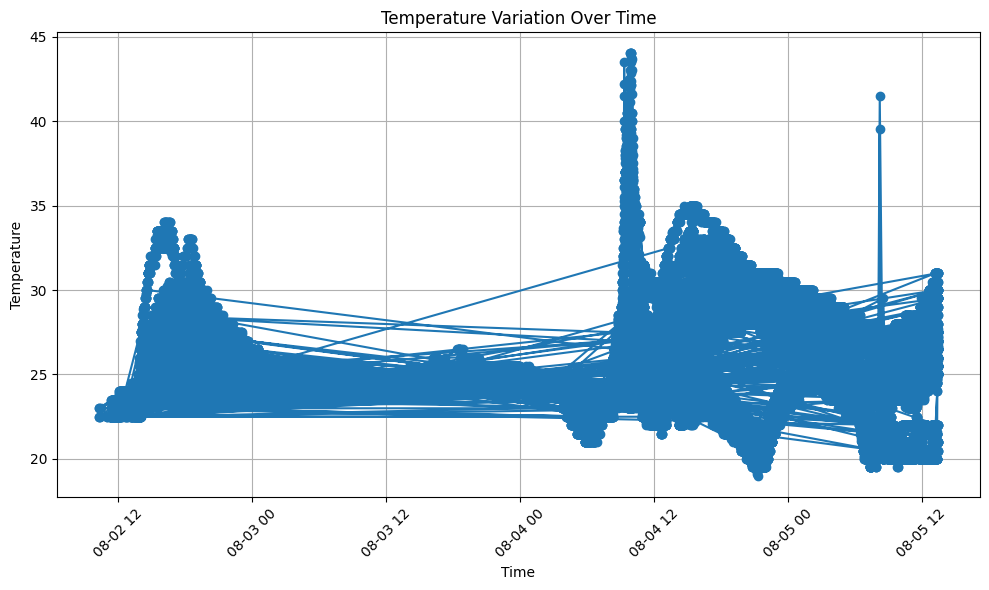

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['time_est'], df['Temperature_C'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Variation Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

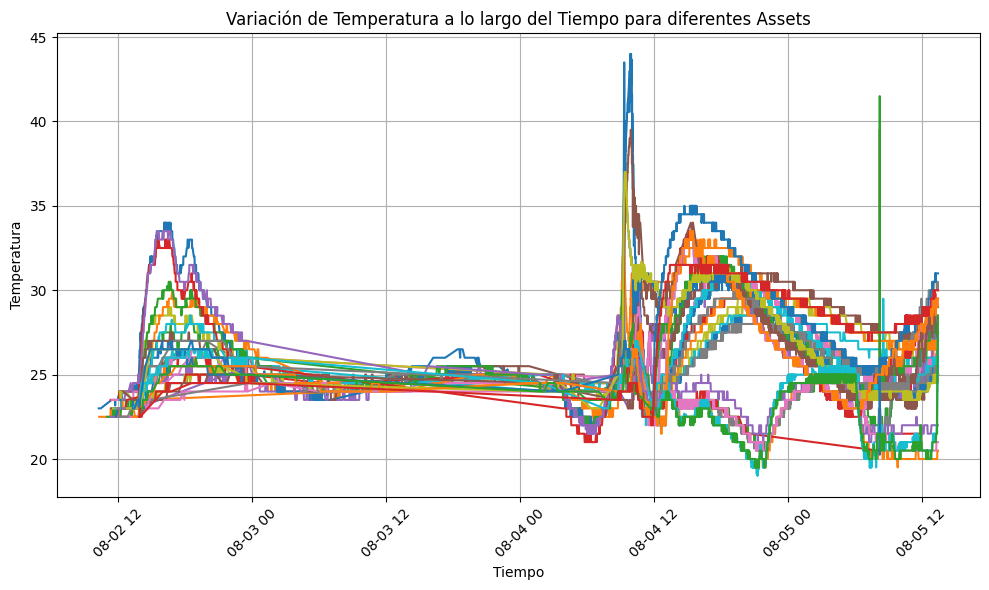

In [ ]:
df = df.sort_values(by='time_est')

# Obtén una lista de los diferentes assets
assets = df['tag_id'].unique()

# Crea una figura y ejes
plt.figure(figsize=(10, 6))

# Itera sobre los diferentes assets y plotea la temperatura para cada uno
for asset in assets:
    temp_data = df[df['tag_id'] == asset]
    plt.plot(temp_data['time_est'], temp_data['Temperature_C'], label=asset)

# Añade etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.title('Variación de Temperatura a lo largo del Tiempo para diferentes Assets')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(True)
#plt.legend()  # Muestra la leyenda con los diferentes assets
plt.tight_layout()
plt.show()

### Question 5:
* Visualize the lon lat data on a map to show how the case traveled.  You may incorporate any other additional information to make this more impactful. Imagine that this would be included in your presentation to the customer. (Non techical audience) (5 pts)

**Do not worry if this looks like non-sense on a map.  Ex:  The trip may appear to occur over water or in a forest because this is a toy dataset.**

In [ ]:
df = pd.read_excel(nombre_archivo)

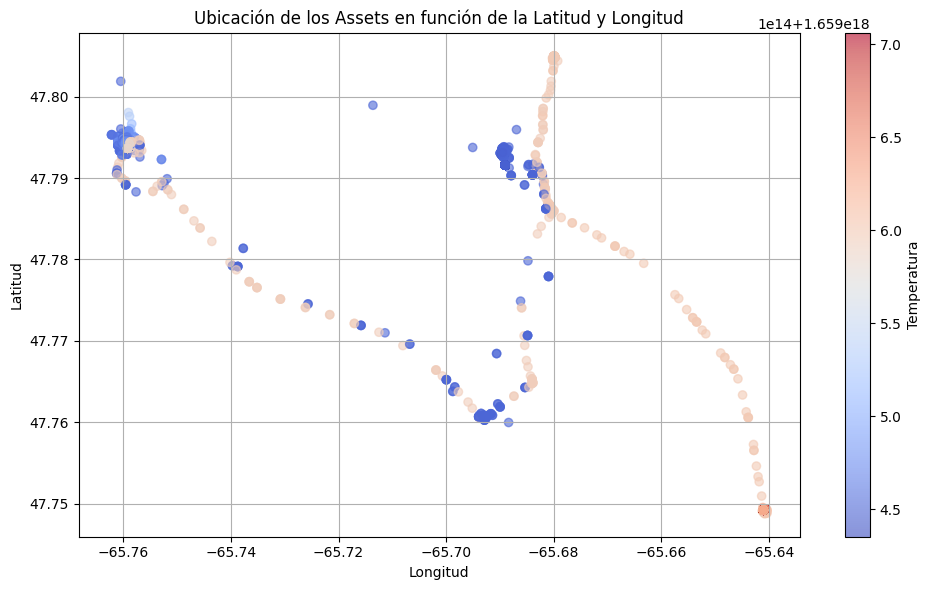

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df con columnas: temperature, lat, long y asset

# Crea una figura y ejes
plt.figure(figsize=(10, 6))

# Grafica latitud vs longitud para cada asset, con el color de los puntos basado en la temperatura
plt.scatter(df['lng'], df['lat'], c=df['time_est'], cmap='coolwarm', alpha=0.6)

# Añade un barra de colores para la temperatura
plt.colorbar(label='Temperatura')

# Añade etiquetas y título
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación de los Assets en función de la Latitud y Longitud')

plt.grid(True)
plt.tight_layout()
plt.show()

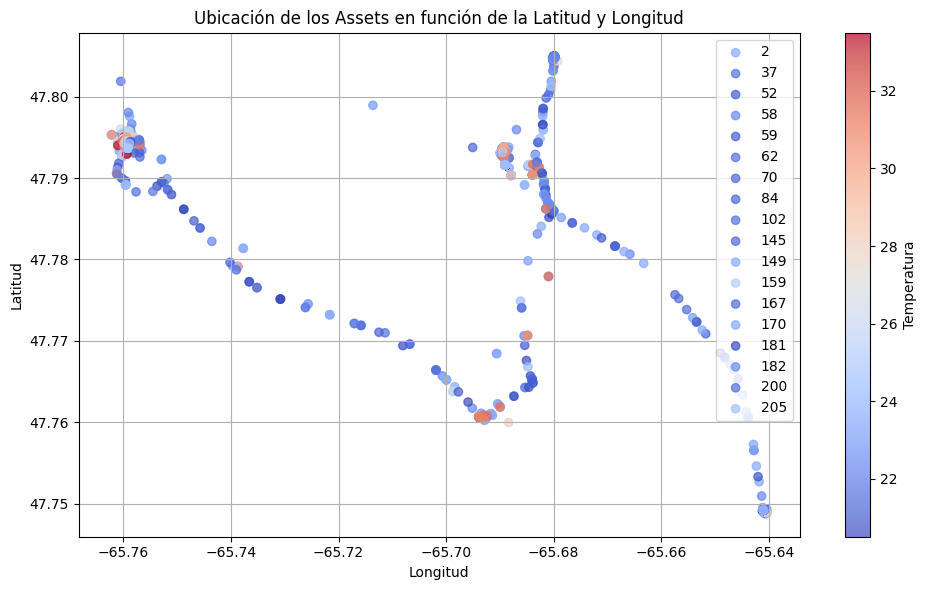

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df con columnas: temperature, lat, long y asset

# Obtén una lista de los diferentes assets
assets = df['asset_id'].unique()

# Crea una figura y ejes
plt.figure(figsize=(10, 6))

# Itera sobre los diferentes assets y grafica latitud vs longitud para cada uno
for asset in assets:
    temp_data = df[df['asset_id'] == asset]
    plt.scatter(temp_data['lng'], temp_data['lat'], c=temp_data['Temperature_C'], cmap='coolwarm', alpha=0.7, label=asset)

# Añade una barra de colores para la temperatura
plt.colorbar(label='Temperatura')

# Añade etiquetas y título
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación de los Assets en función de la Latitud y Longitud')

plt.grid(True)
plt.legend()  # Muestra la leyenda con los diferentes assets
plt.tight_layout()
plt.show()


Seleccione el grupo de activos que desea visualizar:
1. 2
2. 37
3. 52
4. 58
5. 59
6. 62
7. 70
8. 84
9. 102
10. 145
11. 149
12. 159
13. 167
14. 170
15. 181
16. 182
17. 200
18. 205
Ingrese el número correspondiente al grupo de activos: 18


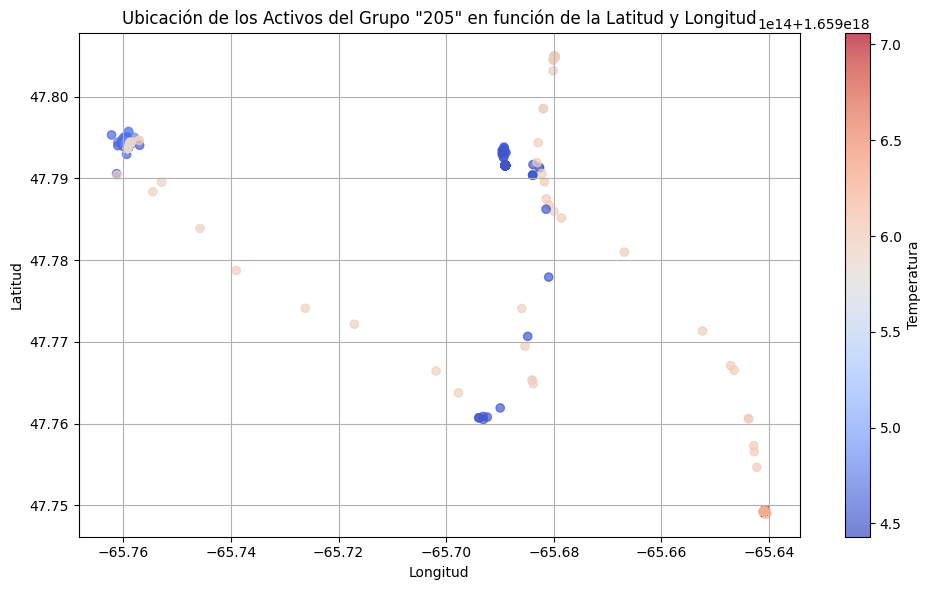

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df con columnas: temperature, lat, long y asset

# Obtén una lista de los diferentes assets
assets = df['asset_id'].unique()

# Solicita al usuario que seleccione el grupo de activos
print("Seleccione el grupo de activos que desea visualizar:")
for i, asset in enumerate(assets):
    print(f"{i+1}. {asset}")

selection = input("Ingrese el número correspondiente al grupo de activos: ")
selected_asset = assets[int(selection) - 1]

# Filtra los datos según el grupo de activos seleccionado por el usuario
selected_data = df[df['asset_id'] == selected_asset]

# Crea una figura y ejes
plt.figure(figsize=(10, 6))

# Grafica latitud vs longitud para el grupo de activos seleccionado, con el color de los puntos basado en la temperatura
plt.scatter(selected_data['lng'], selected_data['lat'], c=selected_data['time_est'], cmap='coolwarm', alpha=0.7)

# Añade una barra de colores para la temperatura
plt.colorbar(label='Temperatura')

# Añade etiquetas y título
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title(f'Ubicación de los Activos del Grupo "{selected_asset}" en función de la Latitud y Longitud')

plt.grid(True)
plt.tight_layout()
plt.show()


# Part 3: Customer Questions


### Question 6:

The customer wants to understand the efficieny of ther DC operations.
* Based on what you see in the data, (all zones except for STORE), which parts of their operation are most & least "efficient? (10 pts)

In [ ]:
# YOUR CODE HERE

YOUR TEXT ANSWER HERE

### Question 7:

The customer wants to understand the stocking efficiency in stores.
* Based on what you see in the data, how quickly did the store unload and stock the merchandise. (5 pts)
* How could this be converted in a KPI that a regional manager could track?  (5 pts)

In [ ]:
# YOUR CODE HERE

YOUR TEXT ANSWER HERE

### Question 8:

Please explain what you would ask for and what you will do with this data, given that you can talk with the following people (no code needed):


YOUR TEXT ANSWER HERE
* a. X
* b. Y

## Part 4: Bonus Insights

### Question 8

The customer is open to hearing about additional insights you found in the data above and beyond what they asked for.
* Based on what you can see in the data, are there any other interesting insights that the customer may want to hear about? (Up to 15 bonus points)



In [ ]:
# YOUR CODE HERE
# Another metrics that could be interesting would be temperature by time

YOUR TEXT ANSWER HERE
